In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import talib
%matplotlib inline

contents = 'I:/data/Wind/Machine Learning/'
data_name = 'RU.csv'
df = contents+data_name
data = pd.read_csv(df)

data.drop_duplicates(inplace=True)
data.fillna(0,inplace=True)
data.isnull().sum()
# data['ratio']=(data.close-data.open)/data.open
print(data.shape)
data.head(3)



(12414, 17)


,ticker,TimeStamp,open,high,low,close,volume,amt,pct_chg,PVC,SKW,KTS,SGH,SR,VOL,CSHSKW,CSHKTS
0,RU1705.SHF,2017/1/3 9:15,18380,18780,18380,18615,59530,11082657600,0.0144,-0.513155,0.948008,3.173884,0.481849,0.344014,0.002895,1.882291,5.631127
1,RU1705.SHF,2017/1/3 9:30,18620,18665,18525,18555,25730,4780102900,-0.0032,-0.207624,-0.164373,2.576013,-0.063556,-0.048743,0.001449,-0.886954,3.858561
2,RU1705.SHF,2017/1/3 9:45,18555,18575,18470,18545,21188,3924376800,-0.0005,-0.587413,-0.336991,2.049955,-0.133180,-0.109213,0.001469,-1.215266,4.569928


In [27]:
def calIndicator(data):
    MA1 = 5
    MA2 = 10
    MA3 = 20
    MA4 = 40
    data['MA1'] = data.close.rolling(MA1).mean()
    data['MA2'] = data.close.rolling(MA2).mean()
    data['MA3'] = data.close.rolling(MA3).mean()
    data['MA4'] = data.close.rolling(MA4).mean()
    
    up_shadow = np.minimum(data['high']-data['open'],data['high']-data['close'])
    down_shadow = np.minimum(data['open']-data['low'],data['close']-data['low'])
    
    solid = data['close']-data['open']
    abshigh = data['high']-data['low']
    
    data['up_shadow'] = up_shadow/abshigh
    data['down_shadow'] = down_shadow/abshigh
    
    data['solid'] = solid/abshigh
    data['abshigh'] = abshigh
    
    
    fastperiod = 12
    slowperiod = 26
    signalperiod = 9
    DIFF, DEA, hist = talib.MACD(data['close'],fastperiod=fastperiod,slowperiod=slowperiod,signalperiod=signalperiod)
    data['DIFF'] = DIFF
    data['DEA'] = DEA
    data['hist'] = hist
    
    data['KD_K'],data['KD_D'] = talib.STOCH(data.high,data.low,data.close,fastk_period=9,slowk_period=3,slowd_period=3)
    
    data['RSI'] = talib.RSI(data.close,timeperiod=14)
    
    data['CCI'] = talib.CCI(data.high,data.low,data.close,timeperiod=14)
    data['ADXR'] = talib.ADXR(data.high,data.low,data.close,timeperiod=14)
    data['ADX'] = talib.ADX(data.high,data.low,data.close,timeperiod=14)
    
    data['upperhand'],data['middleband'],data['lowerband'] = talib.BBANDS(data.close,timeperiod=20,nbdevup=2,nbdevdn=2)
    print('数据集大小:{}'.format(data.shape))
    return data
calIndicator(data).head(3) 

数据集大小:(12414, 37)


,ticker,TimeStamp,open,high,low,close,volume,amt,pct_chg,PVC,...,hist,KD_K,KD_D,RSI,CCI,ADXR,ADX,upperhand,middleband,lowerband
0,RU1705.SHF,2017/1/3 9:15,18380,18780,18380,18615,59530,11082657600,0.0144,-0.513155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RU1705.SHF,2017/1/3 9:30,18620,18665,18525,18555,25730,4780102900,-0.0032,-0.207624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RU1705.SHF,2017/1/3 9:45,18555,18575,18470,18545,21188,3924376800,-0.0005,-0.587413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.dropna(inplace=True)
data.head(3)

,ticker,TimeStamp,open,high,low,close,volume,amt,pct_chg,PVC,...,hist,KD_K,KD_D,RSI,CCI,ADXR,ADX,upperhand,middleband,lowerband
40,RU1705.SHF,2017/1/4 21:45,18460,18475,18335,18380,26364,4847755600,-0.0046,-0.745617,...,50.278480,51.199738,68.960094,50.477619,27.954301,29.923170,24.132942,18695.560886,18268.50,17841.439114
41,RU1705.SHF,2017/1/4 22:00,18380,18520,18380,18500,23446,4325594500,0.0065,0.428642,...,47.281832,45.222555,56.402489,56.126341,51.754166,29.128358,22.888322,18716.944370,18278.25,17839.555630
42,RU1705.SHF,2017/1/4 22:15,18500,18505,18430,18485,14636,2703310400,-0.0008,0.554669,...,42.369666,38.974359,45.132217,55.277567,52.289529,28.337781,21.732603,18728.436864,18283.00,17837.563136


In [29]:
yuzhi = 0.000
data['ratio']=(data.close-data.open)/data.open
data['updown']=data['ratio'].apply(lambda x: 1 if x>=yuzhi else 0)
data.loc[data['ratio']<=-yuzhi,'updown']=-1

print(data.shape)
ud = pd.DataFrame(data['updown'][1:]).reset_index()
data.drop('updown',axis=1,inplace=True)
data = data[:len(data)-1]
print(data.shape)
data['up_down'] = ud.updown
print(data['up_down'].value_counts())
print(data['up_down'].value_counts(-1))
data.head(5)


(12350, 39)
(12349, 38)
-1.0    6721
 1.0    5564
Name: up_down, dtype: int64
-1.0    0.54709
 1.0    0.45291
Name: up_down, dtype: float64


,ticker,TimeStamp,open,high,low,close,volume,amt,pct_chg,PVC,...,KD_D,RSI,CCI,ADXR,ADX,upperhand,middleband,lowerband,ratio,up_down
40,RU1705.SHF,2017/1/4 21:45,18460,18475,18335,18380,26364,4847755600,-0.0046,-0.745617,...,68.960094,50.477619,27.954301,29.923170,24.132942,18695.560886,18268.50,17841.439114,-0.004334,1.0
41,RU1705.SHF,2017/1/4 22:00,18380,18520,18380,18500,23446,4325594500,0.0065,0.428642,...,56.402489,56.126341,51.754166,29.128358,22.888322,18716.944370,18278.25,17839.555630,0.006529,-1.0
42,RU1705.SHF,2017/1/4 22:15,18500,18505,18430,18485,14636,2703310400,-0.0008,0.554669,...,45.132217,55.277567,52.289529,28.337781,21.732603,18728.436864,18283.00,17837.563136,-0.000811,-1.0
43,RU1705.SHF,2017/1/4 22:30,18490,18490,18405,18470,8894,1640642100,-0.0008,-0.081547,...,43.938654,54.391751,32.032755,27.324334,20.424645,18744.817759,18302.50,17860.182241,-0.001082,1.0
44,RU1705.SHF,2017/1/4 22:45,18470,18515,18370,18395,14616,2694239500,-0.0041,-0.480673,...,41.033781,50.071219,-30.126336,25.687463,19.049230,18746.820302,18320.50,17894.179698,-0.004061,-1.0


In [30]:
train_size = int(len(data)*0.8)     
X_train = data.iloc[:train_size,2:len(data.columns)-2]
X_test = data.iloc[train_size:,2:len(data.columns)-2]
y_train = data.up_down[:train_size]
y_test = data.up_down[train_size:]

In [33]:
y_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.__class__,model.score(X_train,y_train),model.score(X_test,y_test))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
y1 = pd.Series(model.predict(X_train))
y2 = pd.Series(model.predict(X_test))
ratios = pd.concat([y1,y2]).value_counts()
print(ratios)

-1.0    12349
dtype: int64


In [ ]:
col_name = data.columns.tolist()
col_name.insert(0,'ticker')
col_name.insert(1,'TimeStamp')
data.reindex(columns=col_name)
data.head(5)
# new_data['ticker'] = data['ticker'][:len(data)-3]
# new_data['TimeStamp'] = data['TimeStamp'][:len(data)-3]
# new_data.head()
new_data.insert(0,'TimeStamp',data['TimeStamp'][:len(data)-3])
new_data.insert(0,'ticker',data['ticker'][:len(data)-3])
new_data.head()

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import talib
%matplotlib inline

contents = 'I:/data/Wind/Machine Learning/'
data_name = 'RU.csv'
df = contents+data_name
data = pd.read_csv(df)
print(data.shape)
data.head(1)
data.drop('pct_chg',axis=1,inplace=True)
data['pct_chg']=(data['close']-data['open'])/data['open']

# 空值补零处理
def fillzero(data):
    data.fillna(0,inplace=True)
    data.drop_duplicates(inplace=True)
    return data

# 空置丢弃处理
def dropout(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    return data

# 添加历史前n个数据作为某样本新的特征， 在添加标签之前执行
def add_features(data,n):
    rows,cols = data.shape 
    new_rows = rows-n
    X = np.zeros((new_rows,(cols-2)*n))
    y = np.zeros((new_rows))
    for i in range(new_rows):
        X[i,:] = np.array(data.iloc[i:i+n,2:]).reshape((1,(cols-2)*n))
    cols_name = list(data.columns[2:])
    for i in range(1,n):
        cols_name.extend(['{}_{}'.format(x,i) for x in data.columns[2:]])
    X_data = pd.DataFrame(X,columns=cols_name)
    X_data.insert(0,'TimeStamp',data['TimeStamp'][:len(data)-n])
    X_data.insert(0,'ticker',data['ticker'][:len(data)-n])
    return X_data
    
    
# 根据设置的阈值添加标签
def add_labels(data,threshold1,threshold2,n):
    if 'labels' in data.columns:
        data.drop('labels',axis=1,inplace=True)
    
    if n>1:
        pct_chg_name = 'pct_chg_{}'.format(n-1)
    else:
        pct_chg_name = 'pct_chg'
#     data['labels']=data[pct_chg_name].apply(lambda x: 1 if x>=threshold else 0)
#     data.loc[data['pct_chg']<-threshold,'labels'] = -1
    data['labels']=0
    data.loc[data[pct_chg_name]>=threshold1,'labels']=1
    data.loc[data[pct_chg_name]<=threshold2,'labels']=-1
    data['new_labels']=data['labels'].shift(-1)
    print(data.labels.value_counts())
    data.dropna(inplace=True)
    return data

def save_pred_data(data,y_pred1,y_pred2):
    # y_pred1,y_pred2为模型预测数据，为ndarray类型
    y_pred1 = list(y_pred1)
    y_pred2 = list(y_pred2)
    y_pred1.extend(y_pred2)
    

    if len(y_pred1)==data.shape[0]:
        data['pred_labels'] = y_pred1
    else:
        print('something error')

def data_split(data,train_size):
    rows_num,cols_num = data.shape
    train_size = int(len(data)*train_size)
    train_data = data[:train_size]
    test_data = data[train_size:rows_num]
    x_train = train_data.iloc[:,2:cols_num-2]
    y_train = train_data.iloc[:,-1]
    x_test = test_data.iloc[:,2:cols_num-2]
    y_test = test_data.iloc[:,-1]
    return x_train,x_test,y_train,y_test

def mymodel(model,x_train,y_train):
    model=model
    model.fit(x_train,y_train)
    return model

# 年化收益率计算  
# data数据包含训练样本以及最后一列的预测值
def year_rate(data,n,trans_cost = False,cost_num=0.0004,time_delta=15):
    """
    inputs:
        data: 整个训练跟测试的样本
        tran_cost: 是否考虑交易成本
        cost_num: 交易成本比例
        time_delta: 数据本身的时间尺度（minutes）
        n: data本身是几个样本作为一个样本输入
    """
    if n>1:
        pct_chg_name = 'pct_chg_{}'.format(n-1)
    else:
        pct_chg_name = 'pct_chg'
    y_pred = data['pred_labels'][1:len(data)-1]
    real_win_loss = np.array(data[1:][pct_chg_name].values) # 实际的利率
    pred_labels = np.array(data[:len(data)-1]['pred_labels'].values)      # 模型预测的标签
    times = abs(pred_labels[:len(pred_labels)-1]) # 相邻之间的买卖次数
    rtn = real_win_loss*pred_labels
    rtn = rtn[1:]
    if trans_cost:
        cost_coff = 1
    else:
        cost_coff = 0
    real_rtn = rtn-times*cost_coff*cost_num
    return real_rtn,real_rtn.mean()/real_rtn.std()*np.sqrt(60/time_delta*6)
    

(12414, 17)


In [628]:
print(data.shape)
time_length=4
new_data = add_features(data,time_length)
print(new_data.shape)
new_data  = add_labels(new_data,0.0012,-0.0012,time_length)
print(new_data.shape)
new_data.tail()

(12414, 17)
(12410, 62)
 0    5305
-1    3627
 1    3478
Name: labels, dtype: int64
(12232, 64)


,ticker,TimeStamp,open,high,low,close,volume,amt,PVC,SKW,...,SKW_3,KTS_3,SGH_3,SR_3,VOL_3,CSHSKW_3,CSHKTS_3,pct_chg_3,labels,new_labels
12404,RU1905.SHF,2019/3/29 10:45,11265.0,11270.0,11250.0,11255.0,6092.0,6.857696e+08,0.146092,-0.200513,...,-0.350339,2.152096,0.000418,0.000322,0.000689,-2.192966,7.567543,0.001327,1,-1.0
12405,RU1905.SHF,2019/3/29 11:00,11255.0,11265.0,11240.0,11250.0,7924.0,8.917029e+08,-0.149465,-0.133093,...,0.569228,3.622001,-0.129653,-0.091249,0.000964,2.753441,10.376707,-0.002208,-1,0.0
12406,RU1905.SHF,2019/3/29 11:15,11255.0,11330.0,11250.0,11305.0,18330.0,2.070302e+09,0.609093,0.075162,...,0.382972,2.252482,0.111597,0.081569,0.000726,2.490186,8.741370,0.000443,0,-1.0
12407,RU1905.SHF,2019/3/29 11:30,11305.0,11320.0,11295.0,11320.0,7908.0,8.940204e+08,0.080024,-0.350339,...,-0.067297,1.912553,-0.683643,-0.638670,0.000601,-0.955095,2.706259,-0.004867,-1,0.0
12408,RU1905.SHF,2019/3/29 13:45,11320.0,11325.0,11275.0,11295.0,10696.0,1.208613e+09,-0.224941,0.569228,...,0.999329,3.556999,0.077275,0.057572,0.000517,1.505391,6.199260,0.000889,0,0.0


In [ ]:
#   (-0.001479-0)  (0-0.001373)各占25%
#   一天大约为4*6 大约24次数据，一天2次交易左右，则大约正负1占比

In [640]:
len(new_data[abs(new_data['pct_chg_3'])>=0.0004])/len(new_data['pct_chg_3'])
## 交易利润大于0.00004大约为85.6%    12414*0.856=10626    大约820天，每天按照1-2笔买卖，总的正负1大约为820*2=1640笔交易
## test_size = 0.2  1640*0.2= 320 

0.8560333551340745

In [653]:
haha = data.iloc[:,2:]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.de

In [654]:
haha.head()


x = PCA(n_components=haha.)
x.fit

,open,high,low,close,volume,amt,PVC,SKW,KTS,SGH,SR,VOL,CSHSKW,CSHKTS,pct_chg
0,18380,18780,18380,18615,59530,11082657600,-0.513155,0.948008,3.173884,0.481849,0.344014,0.002895,1.882291,5.631127,0.012786
1,18620,18665,18525,18555,25730,4780102900,-0.207624,-0.164373,2.576013,-0.063556,-0.048743,0.001449,-0.886954,3.858561,-0.003491
2,18555,18575,18470,18545,21188,3924376800,-0.587413,-0.336991,2.049955,-0.133180,-0.109213,0.001469,-1.215266,4.569928,-0.000539
3,18540,18715,18530,18625,21462,3997231900,0.724920,1.015601,3.152343,0.476195,0.321053,0.001118,1.259247,2.916043,0.004585
4,18620,18655,18565,18640,13500,2512149400,0.016589,-0.950275,3.352408,-0.099137,-0.069457,0.001022,-2.178990,6.051578,0.001074


In [635]:
new_data['pct_chg_3'].describe()

count    12232.000000
mean        -0.000084
std          0.003563
min         -0.038488
25%         -0.001479
50%          0.000000
75%          0.001373
max          0.029461
Name: pct_chg_3, dtype: float64

In [633]:
x=new_data['pct_chg_3'].sort_values()

In [623]:
x_train,x_test,y_train,y_test = data_split(new_data,0.8)
model = mymodel(LogisticRegression(),x_train,y_train)
# model = mymodel(SVC(C=0.01),x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred1=model.predict(x_train)
y_pred2=model.predict(x_test)
print(pd.Series(y_pred1).value_counts())
print(pd.Series(y_pred2).value_counts())

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6344404701073071
0.728238659583163
0.0    9785
dtype: int64
0.0    2447
dtype: int64


In [614]:
save_pred_data(new_data,y_pred1,y_pred2)
new_data.head()

,ticker,TimeStamp,open,high,low,close,volume,amt,pct_chg,PVC,...,SKW_3,KTS_3,SGH_3,SR_3,VOL_3,CSHSKW_3,CSHKTS_3,labels,new_labels,pred_labels
0,RU1705.SHF,2017/1/3 9:15,18380.0,18780.0,18380.0,18615.0,59530.0,1.108266e+10,0.0144,-0.513155,...,1.015601,3.152343,0.476195,0.321053,0.001118,1.259247,2.916043,1,0.0,0.0
1,RU1705.SHF,2017/1/3 9:30,18620.0,18665.0,18525.0,18555.0,25730.0,4.780103e+09,-0.0032,-0.207624,...,-0.950275,3.352408,-0.099137,-0.069457,0.001022,-2.178990,6.051578,0,1.0,0.0
2,RU1705.SHF,2017/1/3 9:45,18555.0,18575.0,18470.0,18545.0,21188.0,3.924377e+09,-0.0005,-0.587413,...,0.553450,2.021714,0.395689,0.293087,0.001037,2.256631,7.692765,1,1.0,0.0
3,RU1705.SHF,2017/1/3 10:00,18540.0,18715.0,18530.0,18625.0,21462.0,3.997232e+09,0.0043,0.724920,...,0.025786,1.705197,0.616561,0.549708,0.000936,1.714781,5.438594,1,-1.0,-1.0
4,RU1705.SHF,2017/1/3 10:15,18620.0,18655.0,18565.0,18640.0,13500.0,2.512149e+09,0.0008,0.016589,...,0.537974,2.132464,-0.332761,-0.298266,0.000770,-1.030144,3.844895,-1,-1.0,-1.0


[1, 2, 3, 2, 3, 4]

(9759, 75)

In [618]:
real_rtn,IR = year_rate(new_data,4,trans_cost=False,cost_num=0.004)

In [619]:
real_rtn

array([ 0.    ,  0.    ,  0.0024, ...,  0.    , -0.    ,  0.    ])

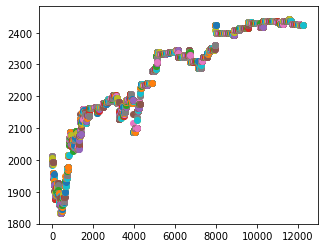

In [649]:
initial = 2000
plt.figure(figsize=(5,4))
k = 0 
for i in real_rtn:
    k+=1
    initial = initial + initial*i
    plt.scatter(k,initial)

In [499]:
haha = real_rtn*2000


In [645]:
IR

0.07857577684303806

In [647]:
real_rtn.sum()*2000+2000

2396.6

In [503]:
np.sqrt(2/3)

0.816496580927726

In [514]:
a=np.array([1,2,3])
b=np.array([2,3,4])
c= np.hstack((a.reshape(3,1),b.reshape(3,1)))
c

array([[1, 2],
       [2, 3],
       [3, 4]])

In [534]:
a=np.array(new_data[1:]['pct_chg_9'].values)
b=np.array(new_data[:len(new_data)-1]['pred_labels'].values)

In [536]:
c=a*b

In [538]:
c.sum()/len(c)

6.915422885572139e-06

In [543]:
times = abs(b[1:]-b[:len(b)-1])
times

array([0., 0., 0., ..., 0., 0., 0.])